In [7]:
from math import sqrt
import numpy as np
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import matthews_corrcoef
from scipy.stats import spearmanr

In [31]:
def fun(s):
  df = read_csv('/content/drive/MyDrive/inno/data.csv', header=0)
  new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', s])
  data = df.sort_index(ascending=True, axis=0)
  for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data[s][i] = data[s][i]
  new_data.index = new_data['Date']
  # new_data.plot()
  # pyplot.show()
  n = int((len(new_data))*(0.8))
  train = new_data[:n]
  valid = new_data[n:]
  #fit the model
  preds = []
  for i in range(0,valid.shape[0]):
    a = train[s][((len(train)) - (valid.shape[0]) + i):].sum() + sum(preds)
    b = a/(valid.shape[0])
    preds.append(b)
  
  valid = valid.assign(Predictions = preds)
  gr = valid[[s, 'Predictions']]
  gr.plot()
  pyplot.show()
  rmse = np.sqrt(np.mean(np.power((np.array(valid[s])-preds),2)))
  print('Test RMSE(Root Mean Squared Error)  : %.3f' % rmse)
  cc = spearmanr(preds, np.array(valid[s]))
  print('Test CC(Corelation Coefficient)     : %.3f' % cc.correlation)
  inv_yhat = preds
  inv_y = valid[s]
  xpb, xob, num, den = 0, 0, 0, 0
  for y in inv_yhat:
    xpb += y
  xpb = xpb/len(inv_yhat)
  for y in inv_y:
    xob += y
    num += y - xpb
    den += y
  xob = xob/len(inv_y)
  pb = num/den
  print('Test PB(Percentage Bias)            : %.3f' % pb)
  num, den = 0, 0
  for i in range(0, len(inv_y)):
    num += ((inv_y[i] - inv_yhat[i])*(inv_y[i] - inv_yhat[i]))
    den += ((inv_y[i] - xob)*(inv_y[i] - xob))
  nse = abs(1 - (num/den))
  print('Test NSE(Nash Sutcliffe Efficiency) : %.3f' % nse)

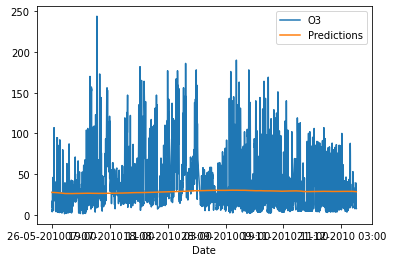

Test RMSE(Root Mean Squared Error)  : 36.315
Test CC(Corelation Coefficient)     : -0.070
Test PB(Percentage Bias)            : 0.234
Test NSE(Nash Sutcliffe Efficiency) : 0.063


In [32]:
fun('O3')

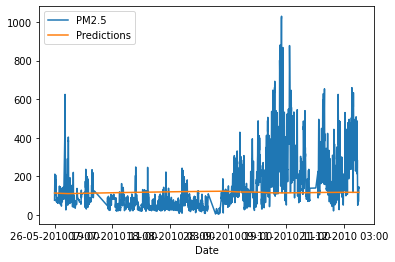

Test RMSE(Root Mean Squared Error)  : 144.350
Test CC(Corelation Coefficient)     : -0.361
Test PB(Percentage Bias)            : 0.200
Test NSE(Nash Sutcliffe Efficiency) : 0.056


In [33]:
fun('PM2.5')

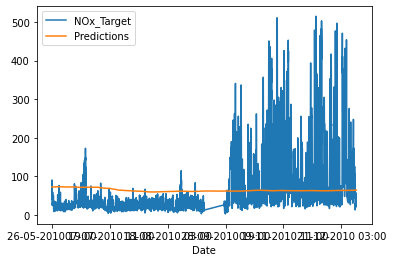

Test RMSE(Root Mean Squared Error)  : 82.302
Test CC(Corelation Coefficient)     : 0.111
Test PB(Percentage Bias)            : -0.007
Test NSE(Nash Sutcliffe Efficiency) : 0.014


In [34]:
fun('NOx_Target')

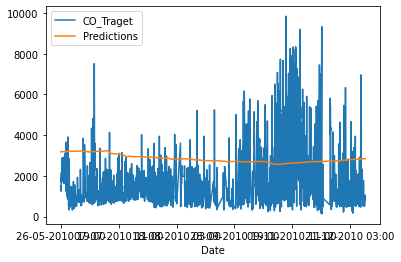

Test RMSE(Root Mean Squared Error)  : 1795.377
Test CC(Corelation Coefficient)     : -0.149
Test PB(Percentage Bias)            : -0.734
Test NSE(Nash Sutcliffe Efficiency) : 0.984


In [35]:
fun('CO_Traget')